<a href="https://colab.research.google.com/github/EuleteSouza/semana_estatisticatarde/blob/aula5/aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('Hello Word')

Hello Word


**# Estudo de Gráficos com Seaborn, Plotly gerando HTML para o Flask**

1.   Alô Mundo
2.   Carregar o DataSet
3.   Criar os top_10
4.   Criar um gráfico no Seaborn
5.   Criar um gráfico interativo
6.   Salvar em html
7.   Criar uma aplicação Flask com o gráfico
8.   Uso de GPT
9.   Avaliações e Faltas








In [2]:
import pandas as pd

In [3]:
# df = pd.read_csv('/content/imigrantes_canada.csv')


url = 'https://raw.githubusercontent.com/romulosilvestre/datasets-semanaestastitica/main/imigrantes_canada.csv'

df = pd.read_csv(url)


In [4]:
df.head()

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


**Seaborn**
1. abstração do matplotlib
2. paleta de cores personalizadas
3. facilidade e produtividade
4. robusto
5. mais graficos de mais dimensões


In [5]:
import seaborn as sns

In [6]:
# Como definir a coluna País como um indice

df.set_index('País',inplace=True)

In [7]:
top_10 = df.sort_values(by='Total',ascending=False).head(10)

In [8]:
top_10

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Índia,Ásia,Sul da Ásia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Ásia,Ásia Oriental,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Reino Unido e Irlanda do Norte,Europa,Norte da Europa,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Filipinas,Ásia,Sudeste Asiático,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Paquistão,Ásia,Sul da Ásia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Estados Unidos da América,América do Norte,América do Norte,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Irã,Ásia,Sul da Ásia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Ásia,Sul da Ásia,185,371,290,197,1086,845,1838,4447,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
República da Coreia,Ásia,Ásia Oriental,1011,1456,1572,1081,847,962,1208,2338,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


Temas do Seaborn

In [9]:
import matplotlib.pyplot as plt


In [10]:
sns.set_theme()

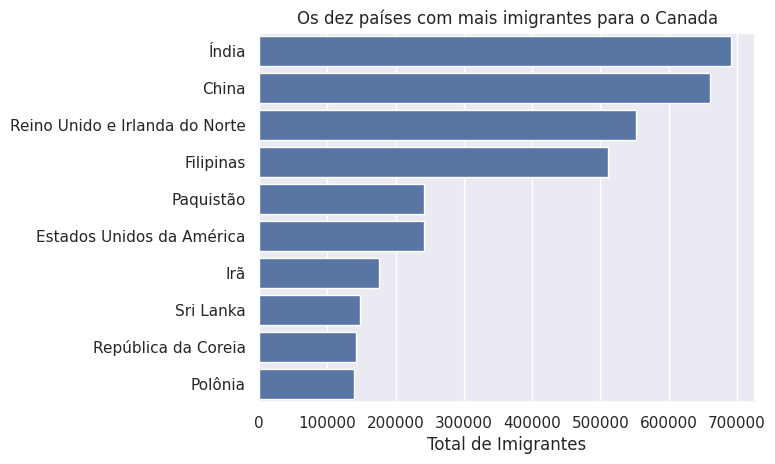

In [11]:
ax = sns.barplot(data=top_10,y=top_10.index,x='Total',orient='h')
ax.set(
    title='Os dez países com mais imigrantes para o Canada',
    xlabel='Total de Imigrantes',
    ylabel=''
)
plt.show()

In [12]:
def gerar_grafico_paleta(pallete):
  fig,ax = plt.subplots(figsize=(8,4))
  ax = sns.barplot(data=top_10,y=top_10.index,x='Total',
                   orient='h',
                   palette=pallete)
  ax.set_title('Os dez países com mais imigrantes para o Canadá',
               loc='left',
               fontsize=16)
  ax.set_xlabel('Total de Imigrantes',fontsize=14)
  ax.set_ylabel('')
  plt.show()

In [13]:
pallete = sns.color_palette("tab10")

<ipython-input-12-9e6bea1a65d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10,y=top_10.index,x='Total',


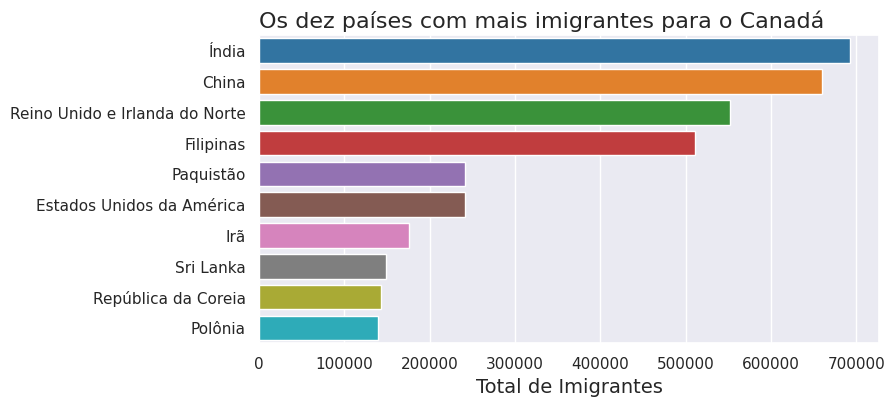

In [14]:
# prompt: mostrar grafico

gerar_grafico_paleta(pallete)


<ipython-input-12-9e6bea1a65d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10,y=top_10.index,x='Total',


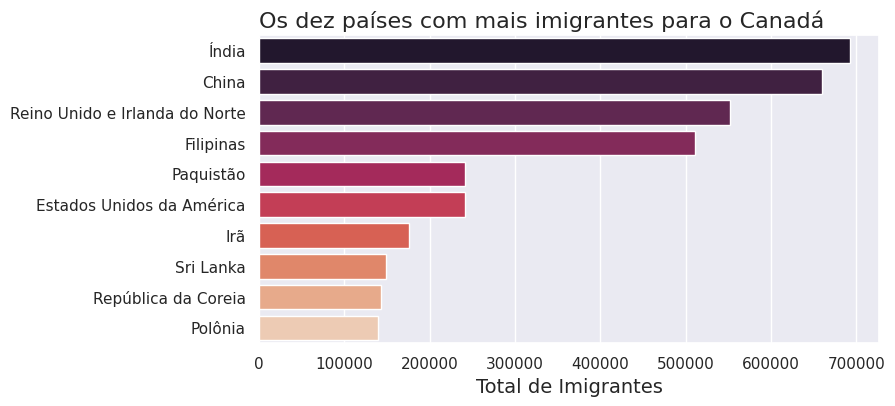

In [15]:
pallete = sns.color_palette("rocket")
gerar_grafico_paleta('rocket')

<ipython-input-12-9e6bea1a65d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10,y=top_10.index,x='Total',


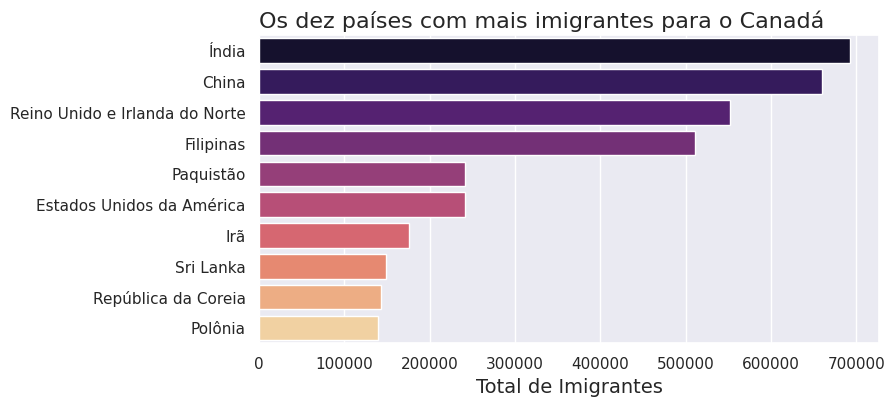

In [16]:

gerar_grafico_paleta("magma")

<ipython-input-12-9e6bea1a65d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10,y=top_10.index,x='Total',


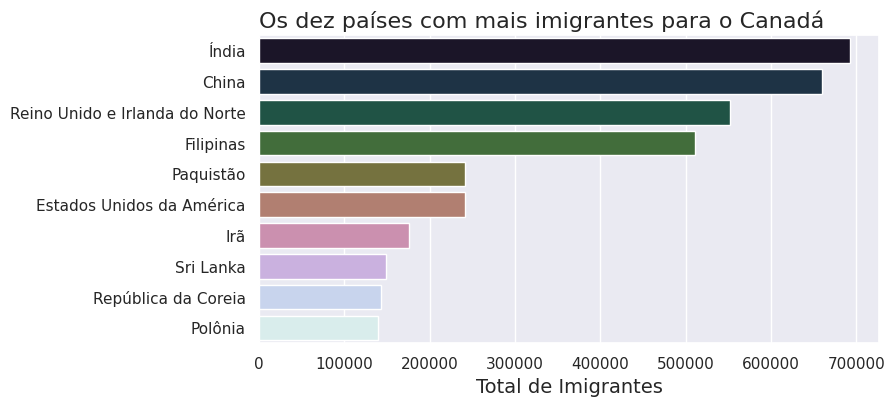

In [17]:

gerar_grafico_paleta("cubehelix")

<ipython-input-12-9e6bea1a65d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10,y=top_10.index,x='Total',


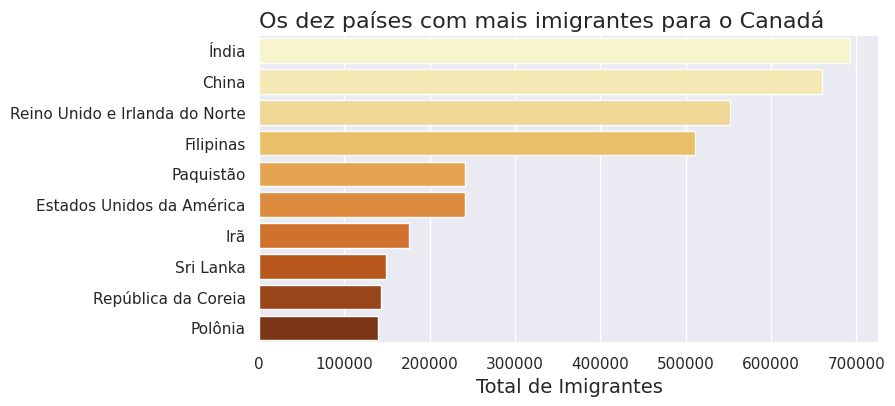

In [18]:

gerar_grafico_paleta("YlOrBr")


<ipython-input-12-9e6bea1a65d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10,y=top_10.index,x='Total',


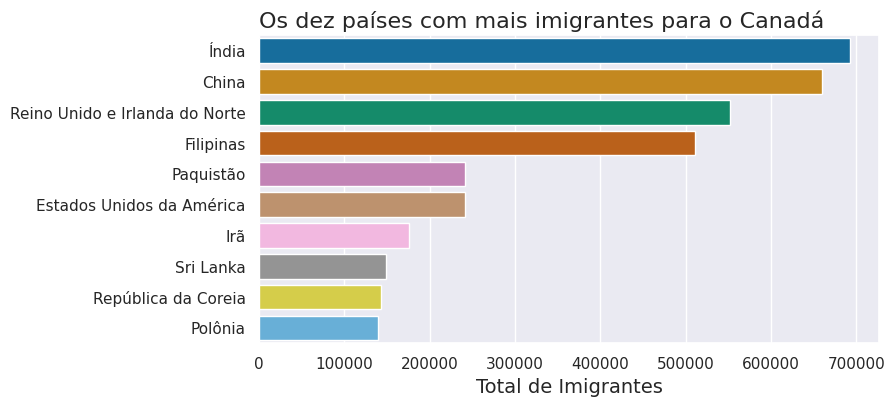

In [19]:
gerar_grafico_paleta('colorblind')

<ipython-input-12-9e6bea1a65d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10,y=top_10.index,x='Total',


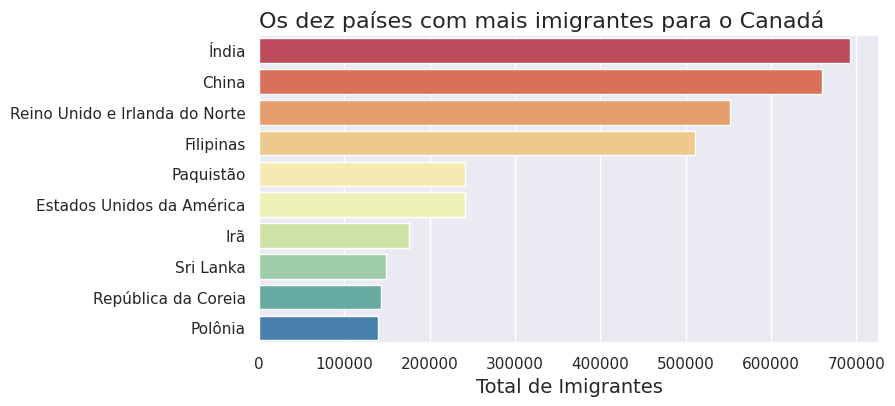

In [20]:
gerar_grafico_paleta("Spectral")

# Gráficos Interativos com Plotly

In [21]:
import plotly.express as px

In [22]:
anos = list(map(str,range(1980,2014)))

In [23]:
brasil = df.loc['Brasil',anos]

In [24]:
brasil_dict = {'ano':brasil.index.tolist(),'imigrantes':brasil.values.tolist()}

In [25]:
dados_brasil = pd.DataFrame(brasil_dict)

In [26]:
dados_brasil.head()

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145


In [34]:
fig = px.line(dados_brasil,x='ano',y='imigrantes',title='Imigrantes do Brasil para o Canadá \n de 1980 a 2013')
# centralizar titulo
fig.update_layout(title_x=0.5)
# modificar a disposição dos anos no eixo x
fig.update_layout(width=1000,
                  height=500,
                  xaxis={'tickangle':-45})
# espessura da linha e cor
fig.update_traces(line_color='#5A05FA',line_width=6)
fig.show()

In [35]:
# transformar o gráfico em html
fig.write_html('imigrantes_brasil.html')
